In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
import cv2


# Keras Pre-processing

Splitting into training and validation data sets

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
       r'C:\\Users\\SAMA\\Downloads\\brain tumor\\Training', 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
          r'C:\\Users\\SAMA\\Downloads\\brain tumor\\Testing',
        target_size=(150, 150),
        batch_size=20,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=True)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


# After pre-processing

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


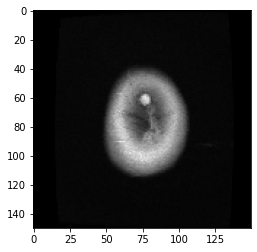

In [3]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    plt.imshow(data_batch[0])
    break

This is what an individual image looks like after re-scaling

# Building model

In [3]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/30


C:\Users\SAMA\AppData\Local\Temp\ipykernel_7620\2706347818.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 45s 435ms/step - loss: 0.4873 - acc: 0.4889 - val_loss: 0.6151 - val_acc: 0.3000
Epoch 2/30
100/100 [==============================] - 45s 452ms/step - loss: 0.4017 - acc: 0.6151 - val_loss: 0.9193 - val_acc: 0.2500
Epoch 3/30
100/100 [==============================] - 45s 451ms/step - loss: 0.3543 - acc: 0.6810 - val_loss: 0.7443 - val_acc: 0.3000
Epoch 4/30
100/100 [==============================] - 49s 490ms/step - loss: 0.3209 - acc: 0.7276 - val_loss: 0.8020 - val_acc: 0.3500
Epoch 5/30
100/100 [==============================] - 45s 445ms/step - loss: 0.2827 - acc: 0.7673 - val_loss: 0.6358 - val_acc: 0.6000
Epoch 6/30
100/100 [==============================] - 45s 453ms/step - loss: 0.2683 - acc: 0.7805 - val_loss: 0.8694 - val_acc: 0.5500
Epoch 7/30
100/100 [==============================] - 49s 487ms/step - loss: 0.2456 - acc: 0.8050 - val_loss: 0.5110 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 46s 462ms/st

Finding accuracy of model on test data set

In [6]:
test_generator = test_datagen.flow_from_directory(
          r'C:\\Users\\SAMA\\Downloads\\brain tumor\\Testing',
        target_size=(150, 150),
        batch_size=20,
        color_mode='rgb',
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 394 images belonging to 4 classes.


C:\Users\SAMA\AppData\Local\Temp\ipykernel_7620\21828356.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.7741116881370544
